# For our mini-project, we plan to analyse how the local Big Mac prices of various countries are affected by the Purchasing Power Parity (PPP) and the average gold price in their country. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [2]:
Macdata = pd.read_csv('bigmac.csv')
Macdata.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00,2.500000,-0.00398,0.05007,-0.16722,-0.09864,1.09091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-01,AUS,AUD,Australia,2.59,1.68,1.541667,-0.38579,-0.35246,-0.48645,-0.44416,0.28939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79,1.648045,-0.34341,-0.30778,-0.45102,-0.40581,0.37836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,CAN,CAD,Canada,2.85,1.47,1.938776,-0.22758,-0.18566,-0.35417,-0.30099,0.62152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70,3.470588,0.38270,0.45774,0.15609,0.25130,1.90267,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Mac = pd.DataFrame(Macdata[["date", "name", "dollar_ex", "local_price","dollar_price"]])
Mac.head()

,date,name,dollar_ex,local_price,dollar_price
0,2000-04-01,Argentina,1.00,2.50,2.500000
1,2000-04-01,Australia,1.68,2.59,1.541667
2,2000-04-01,Brazil,1.79,2.95,1.648045
3,2000-04-01,Canada,1.47,2.85,1.938776
4,2000-04-01,Switzerland,1.70,5.90,3.470588


#### Reformating the "date" column to Year

In [4]:
from datetime import datetime

# Define a function to extract the year
def extract_year(date_string):
    date_object = datetime.strptime(date_string, '%Y-%m-%d')
    return date_object.year

# Apply the function to the date column
Mac['Year'] = Mac['date'].apply(lambda x: extract_year(x))

# Drop the original date column if needed
Mac.drop(columns=['date'], inplace=True)
Mac.head()

,name,dollar_ex,local_price,dollar_price,Year
0,Argentina,1.00,2.50,2.500000,2000
1,Australia,1.68,2.59,1.541667,2000
2,Brazil,1.79,2.95,1.648045,2000
3,Canada,1.47,2.85,1.938776,2000
4,Switzerland,1.70,5.90,3.470588,2000


In [5]:
Golddata = pd.read_csv('gold_price_yearly.csv')
Golddata.head()

,Year,Average Closing Price,Year Open,Year High,Year Low,Year Range Price,Year Close,Annual % Change
0,1969,41.10,41.80,43.75,35.00,8.75,35.21,-0.161
1,1970,35.96,35.13,39.19,34.78,4.41,37.38,0.062
2,1971,40.80,37.33,43.90,37.33,6.57,43.50,0.164
3,1972,58.17,43.73,70.00,43.73,26.27,64.70,0.487
4,1973,97.12,64.99,127.00,64.10,62.90,112.25,0.735


In [6]:
Gold = pd.DataFrame(Golddata[["Year", "Average Closing Price", "Annual % Change"]])
Gold.head()

,Year,Average Closing Price,Annual % Change
0,1969,41.10,-0.161
1,1970,35.96,0.062
2,1971,40.80,0.164
3,1972,58.17,0.487
4,1973,97.12,0.735


#### Merge the Gold(goldprice) dataset and Mac(big mac) dataset together

In [7]:
# Merge datasets on the 'Year' column
merged_df = pd.merge(Mac, Gold, on='Year', how='inner')

# Drop rows with extra years
Year = set(Mac['Year']).intersection(set(Gold['Year']))
merged_df = merged_df[merged_df['Year'].isin(Year)]

merged_df.head()

,name,dollar_ex,local_price,dollar_price,Year,Average Closing Price,Annual % Change
0,Argentina,1.00,2.50,2.500000,2000,279.29,-0.063
1,Australia,1.68,2.59,1.541667,2000,279.29,-0.063
2,Brazil,1.79,2.95,1.648045,2000,279.29,-0.063
3,Canada,1.47,2.85,1.938776,2000,279.29,-0.063
4,Switzerland,1.70,5.90,3.470588,2000,279.29,-0.063


#### Rename the columns, move "Year" column in front

In [8]:
new_column_names = {
    'name': 'Country',
    'dollar_ex': 'Exchange Rate',
    'local_price': 'Local Price',
    'dollar_price': 'Local Price in USD',
    'Average Closing Price': 'Average Gold Price',
    'Annual % Change': 'Annual % Change_Gold'
}
merged_df.rename(columns=new_column_names, inplace=True)

year_column = merged_df.pop("Year")
# Insert the "Year" column at the beginning of the DataFrame
merged_df.insert(0, "Year", year_column)

merged_df.head()

,Year,Country,Exchange Rate,Local Price,Local Price in USD,Average Gold Price,Annual % Change_Gold
0,2000,Argentina,1.00,2.50,2.500000,279.29,-0.063
1,2000,Australia,1.68,2.59,1.541667,279.29,-0.063
2,2000,Brazil,1.79,2.95,1.648045,279.29,-0.063
3,2000,Canada,1.47,2.85,1.938776,279.29,-0.063
4,2000,Switzerland,1.70,5.90,3.470588,279.29,-0.063


#### Check duplicates in the dataset ---- there are repeated datas of the same country in the same year, as shown below by checking the Local Price of US in big mac dataset  

In [9]:
USprice = merged_df[merged_df['Country'] == 'United States'].set_index('Year')['Local Price']
print(USprice)

Year
2000    2.510000
2001    2.540000
2002    2.490000
2003    2.710000
2004    2.900000
2005    3.060000
2006    3.150000
2006    3.100000
2007    3.220000
2007    3.410000
2008    3.570000
2009    3.570000
2010    3.580000
2010    3.733333
2011    4.065000
2012    4.197220
2012    4.327500
2013    4.367396
2013    4.556667
2014    4.624167
2014    4.795000
2015    4.790000
2015    4.790000
2016    4.930000
2016    5.040000
2017    5.060000
2017    5.300000
2018    5.280000
2018    5.510000
2019    5.580000
2019    5.740000
2020    5.670000
2020    5.710000
Name: Local Price, dtype: float64


#### Remove the duplicate data

In [10]:
# Remove duplicate rows based on 'Year' and 'Country'
cleaned_data = merged_df.drop_duplicates(subset=['Year', 'Country'])

# Reset index to avoid a hierarchical index
cleaned_data.reset_index(drop=True, inplace=True)

#the values with the same year and country is removed, so now each year, each country only has one value.
USprice = cleaned_data[cleaned_data['Country'] == 'United States'].set_index('Year')['Local Price']
print(USprice)

Year
2000    2.510000
2001    2.540000
2002    2.490000
2003    2.710000
2004    2.900000
2005    3.060000
2006    3.150000
2007    3.220000
2008    3.570000
2009    3.570000
2010    3.580000
2011    4.065000
2012    4.197220
2013    4.367396
2014    4.624167
2015    4.790000
2016    4.930000
2017    5.060000
2018    5.280000
2019    5.580000
2020    5.670000
Name: Local Price, dtype: float64


In [11]:
result_df = pd.DataFrame(cleaned_data)

In [12]:
PPPData = pd.read_csv('OECD_PPP.csv', encoding='unicode_escape')
PPPData.head()

,Year,Country,PPP Value
0,2000,Albania,42.017
1,2000,Argentina,0.664
2,2000,Australia,1.312
3,2000,Austria,0.908
4,2000,Belgium,0.900


In [13]:
PPP_df = pd.DataFrame(PPPData)
PPP_df.head()

,Year,Country,PPP Value
0,2000,Albania,42.017
1,2000,Argentina,0.664
2,2000,Australia,1.312
3,2000,Austria,0.908
4,2000,Belgium,0.900


#### Merge PPP value into the previous dataset

In [14]:
# Merge result_df with PPP_df on 'Year' and 'Country' columns
combined_df = pd.merge(result_df, PPP_df, on=['Year', 'Country'], how='left')
combined_df.head()

,Year,Country,Exchange Rate,Local Price,Local Price in USD,Average Gold Price,Annual % Change_Gold,PPP Value
0,2000,Argentina,1.00,2.50,2.500000,279.29,-0.063,0.664
1,2000,Australia,1.68,2.59,1.541667,279.29,-0.063,1.312
2,2000,Brazil,1.79,2.95,1.648045,279.29,-0.063,0.758
3,2000,Canada,1.47,2.85,1.938776,279.29,-0.063,1.228
4,2000,Switzerland,1.70,5.90,3.470588,279.29,-0.063,1.789


In [26]:
combined_df.dropna(subset=['PPP Value'], inplace=True)
combined_df.tail(60)

,Year,Country,Exchange Rate,Local Price,Local Price in USD,Average Gold Price,Annual % Change_Gold,PPP Value
762,2019,Switzerland,0.981650,6.50,6.621505,1393.34,0.188,1.134
763,2019,Chile,678.990000,2640.00,3.888128,1393.34,0.188,397.674
764,2019,China,6.849700,20.90,3.051229,1393.34,0.188,4.208
765,2019,Colombia,3191.500000,11900.00,3.728654,1393.34,0.188,1312.630
766,2019,Costa Rica,606.975000,2290.00,3.772808,1393.34,0.188,324.217
767,2019,Czech Republic,22.311650,85.00,3.809669,1393.34,0.188,12.097
768,2019,Denmark,6.515450,30.00,4.604440,1393.34,0.188,6.538
770,2019,Euro area,0.872486,4.05,4.641908,1393.34,0.188,0.695
771,2019,Britain,0.783208,3.19,4.072992,1393.34,0.188,0.670
773,2019,Hong Kong,7.834350,20.00,2.552860,1393.34,0.188,6.100


### Using boxplot to check if the Categorical variable, "Country" and the Continuous variable, "Year" are good predictors for Big Mac Prices

### We are using Local Price in USD for standardization, ensuring that comparisons across countries can be made without being influenced by exchange rate fluctuations. The box plots for each country can be visualised easier as well, which allows us to make good general judgements just by looking.

<Axes: xlabel='Country', ylabel='Local Price in USD'>

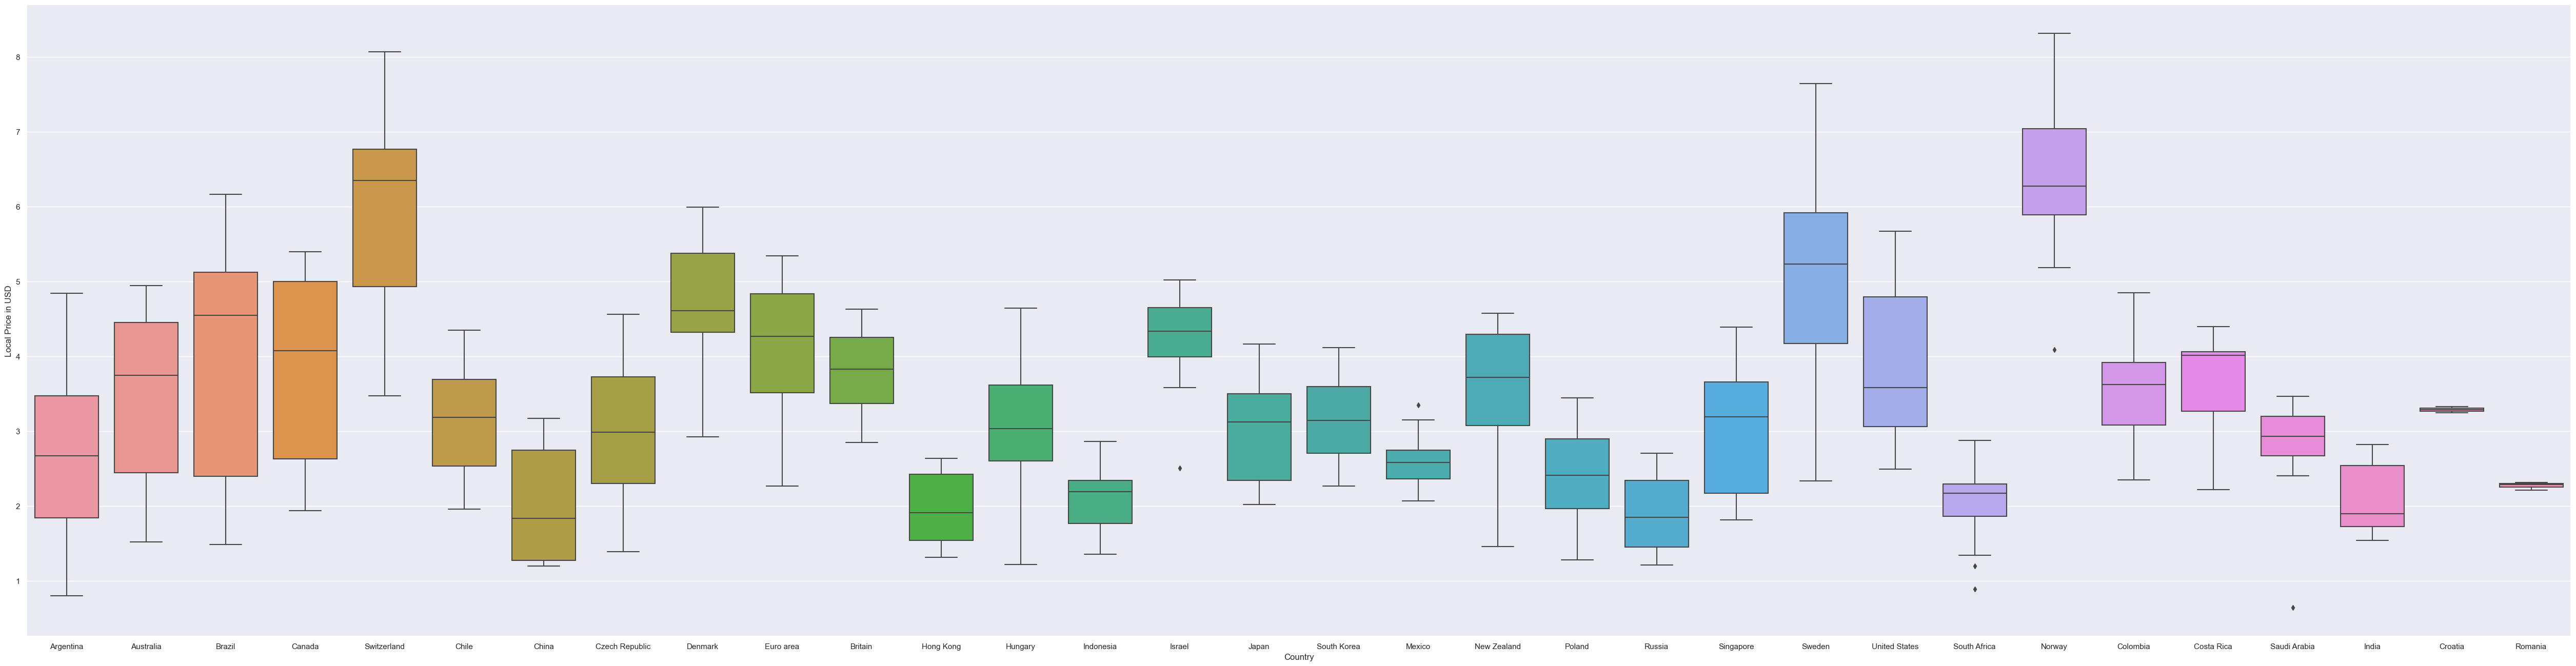

In [16]:
f = plt.figure(figsize=(64,16))
sb.boxplot(x = "Country", y = "Local Price in USD", data = combined_df)

### The "Local Price in USD" against "Country" boxplot shows the distribution of all Big Mac prices from 2000 to 2020 for each of the 28 countries. 

### Country is a good predictor because Local Price of a Big Mac (in USD) changes significantly for different countries, allowing us to see the relationship between a country and their Big Mac price sufficiently well.

<Axes: xlabel='Year', ylabel='Local Price in USD'>

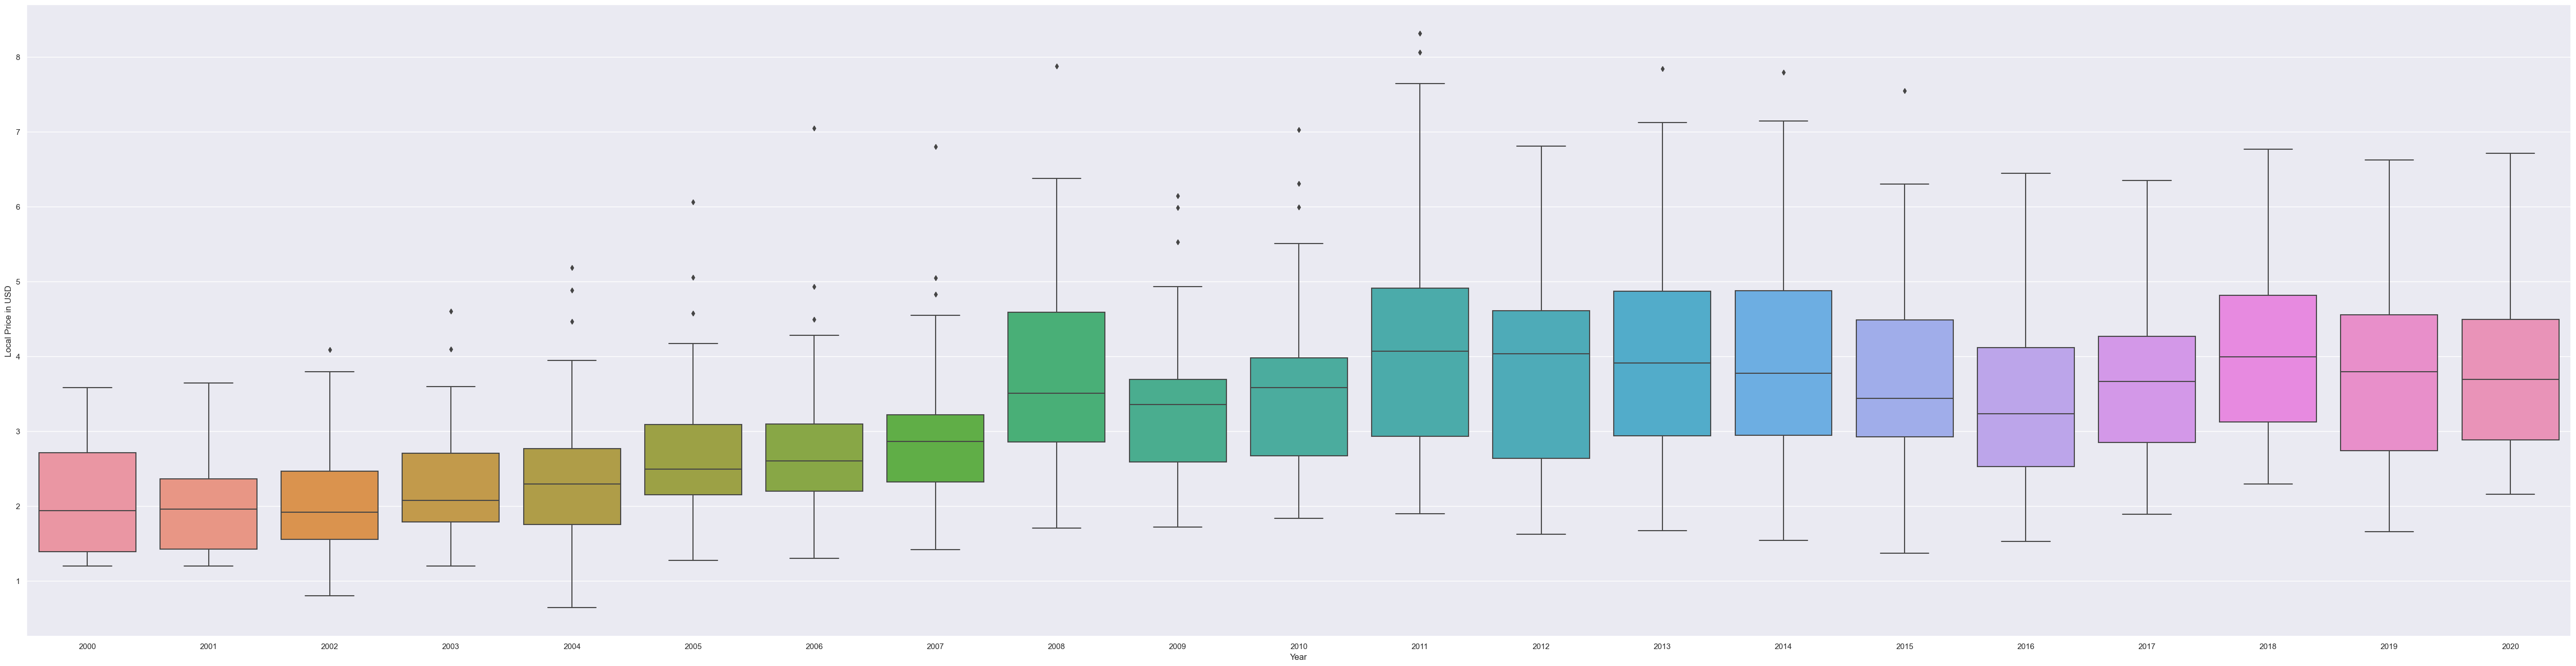

In [17]:
f = plt.figure(figsize=(64,16))
sb.boxplot(x = "Year", y = "Local Price in USD", data = combined_df)

### The "Local Price in USD" against "Year" boxplot show the distribution of the local Big Mac price (in USD) in all 28 countries for every year from 2000 to 2020. 

### We can see that generally, there is some variation in the local price (in USD) across different years. Thus, it represents the relationship between local price of a Big Mac (in USD) and the year sufficiently well.

## As such, Country and Year are sufficiently good variables to be used as predictors for Big Mac Prices.

### Using a line chart to examine how Big Mac prices change from 2000 to 2020 in the US. 
#### Zoom in on the US specifically to see how Big Mac prices in the US have changed over the years to determine if there is actually a change in the Big Mac prices or is it just inflation changing each countries' Big Mac prices.

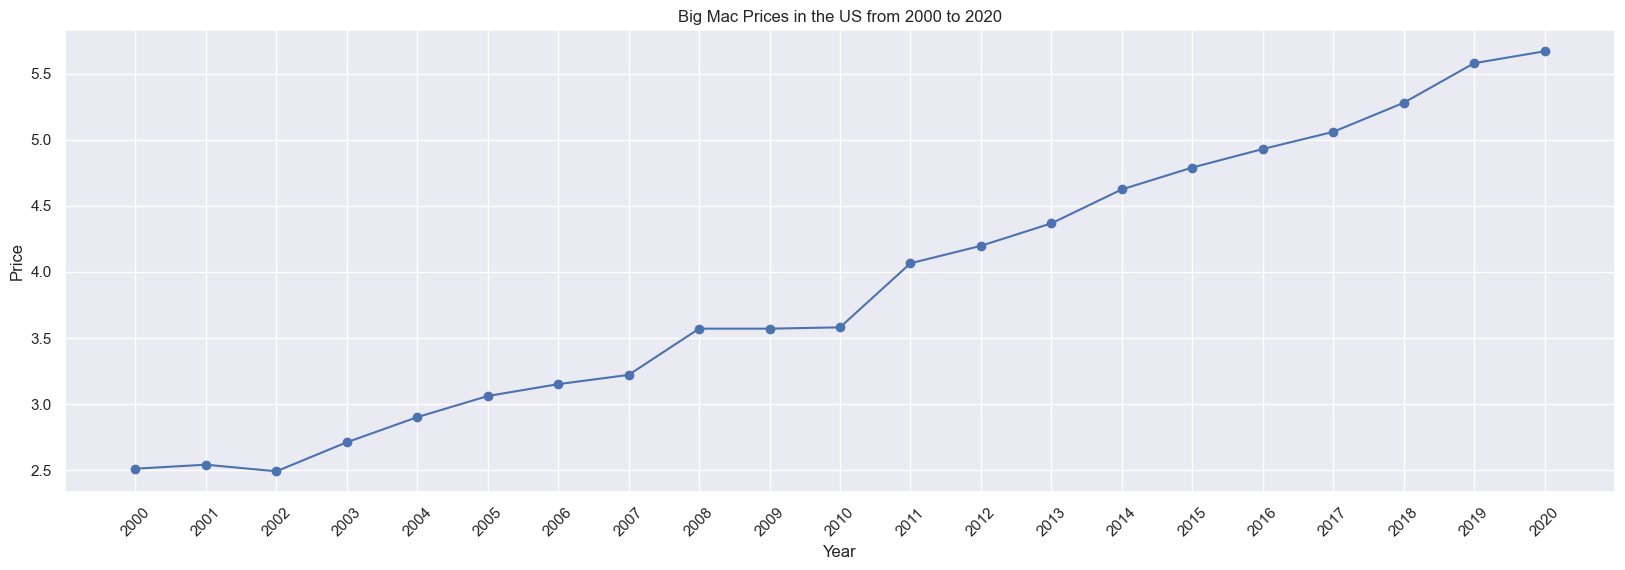

In [18]:
US = combined_df[combined_df['Country'] == 'United States']
plt.figure(figsize=(20, 6))
plt.plot(US['Year'], US['Local Price'], marker='o', linestyle='-')
plt.title('Big Mac Prices in the US from 2000 to 2020')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(US['Year'], rotation=45)
plt.show()

In [19]:
globalinflation_df = pd.read_csv('globalinflation.csv')
globalinflation_df.head()

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual average inflation (consumer prices) rate,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3


In [20]:
# Reshape to long format
inflation_long_df = pd.melt(globalinflation_df, id_vars=['country_name', 'indicator_name'], var_name='year', value_name='inflation_rate')
inflation_long_df['year'] = pd.to_numeric(inflation_long_df['year'], errors='coerce')
inflation_long_df.head()

,country_name,indicator_name,year,inflation_rate
0,Afghanistan,Annual average inflation (consumer prices) rate,1980,13.4
1,Albania,Annual average inflation (consumer prices) rate,1980,NaN
2,Algeria,Annual average inflation (consumer prices) rate,1980,9.7
3,Andorra,Annual average inflation (consumer prices) rate,1980,NaN
4,Angola,Annual average inflation (consumer prices) rate,1980,46.7


#### Extract the year, country name and inflation rate from the dataframe

In [21]:
inflation_rate_df = inflation_long_df[['year', 'country_name','inflation_rate']]
inflation_rate_df.head()

,year,country_name,inflation_rate
0,1980,Afghanistan,13.4
1,1980,Albania,NaN
2,1980,Algeria,9.7
3,1980,Andorra,NaN
4,1980,Angola,46.7


In [22]:
inflation_df = inflation_rate_df[(inflation_rate_df['year']>=2000)&(inflation_rate_df['year']<=2020)]
inflation_df = inflation_df.rename(columns={'country_name':'Country'})
inflation_df = inflation_df.rename(columns={'year':'Year'})
inflation_df = inflation_df.rename(columns={'inflation_rate' : 'Inflation Rate'})

In [28]:
merged_df = pd.merge(combined_df, inflation_df, how = 'inner', on = ['Year', 'Country'])
#clean_merged_df = merged_df.drop_duplicates(subset=['Year', 'Country'])
#clean_merged_df.reset_index(drop=True, inplace=True)
merged_df.tail(60)

,Year,Country,Exchange Rate,Local Price,Local Price in USD,Average Gold Price,Annual % Change_Gold,PPP Value,Inflation Rate
522,2019,Brazil,3.717950,16.90,4.545516,1393.34,0.188,2.279,3.7
523,2019,Canada,1.331400,6.77,5.084873,1393.34,0.188,1.218,1.9
524,2019,Switzerland,0.981650,6.50,6.621505,1393.34,0.188,1.134,0.4
525,2019,Chile,678.990000,2640.00,3.888128,1393.34,0.188,397.674,2.2
526,2019,China,6.849700,20.90,3.051229,1393.34,0.188,4.208,2.9
527,2019,Colombia,3191.500000,11900.00,3.728654,1393.34,0.188,1312.630,3.5
528,2019,Costa Rica,606.975000,2290.00,3.772808,1393.34,0.188,324.217,2.1
529,2019,Czech Republic,22.311650,85.00,3.809669,1393.34,0.188,12.097,2.8
530,2019,Denmark,6.515450,30.00,4.604440,1393.34,0.188,6.538,0.7
531,2019,Britain,0.783208,3.19,4.072992,1393.34,0.188,0.670,1.8


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Separate predictors and response variable
X = combined_df[['Year', 'Country', 'Local Price']]
y = combined_df['PPP Value']

# Define preprocessing steps for the categorical variable 'Country'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Country'])
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and linear regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X, y)

# Multi-Variate Linear Regression
We will start by setting up a Multi-Variate Linear Regression problem.

Response Variable : PPP
Predictor Feature : Year, Country, Local Price In USD, Average Gold Price

Regression Model : PPP =  𝑎1 x Year +  𝑎2 × Country +  𝑎3 × Local Price In USD + 𝑎4 x Average Gold Price +  𝑏

#### Extract the variables and the associated data as a Pandas DataFrame.

In [ ]:
# Extract Response and Predictors
y = pd.DataFrame(combined_df["PPP Value"])
X = pd.DataFrame(combined_df[["Big Mac Index", "Average Gold Price"]])

#### Set up the regression problem with Train and Test datasets with a 80:20 split.

In [ ]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

### Basic Exploration
Perform basic statistical exploration and visualization on the Train Set.

In [ ]:
# Summary Statistics for Response
y_train.describe()

In [ ]:
# Summary Statistics for Predictors
X_train.describe()

In [ ]:
# Drop rows with missing values
y_train.dropna(inplace=True)
print(y_train.shape)
y_train.head(60)

In [ ]:
# Convert "PPP Value" column to numeric (if not already numeric)
y_train["PPP Value"] = pd.to_numeric(y_train["PPP Value"])

# Plotting the distribution of Response (PPP Value)
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(y=y_train["PPP Value"], orient="h", ax=axes[0])
sb.histplot(data=y_train["PPP Value"], ax=axes[1])
sb.violinplot(y=y_train["PPP Value"], orient="h", ax=axes[2])

plt.show()

In [ ]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [ ]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)